In [1]:
!pip3 install ktrain

     |████████████████████████████████| 25.3 MB 84 kB/s 
     |████████████████████████████████| 6.8 MB 22.0 MB/s 
     |████████████████████████████████| 981 kB 65.8 MB/s 
     |████████████████████████████████| 263 kB 37.3 MB/s 
     |████████████████████████████████| 2.8 MB 42.6 MB/s 
     |████████████████████████████████| 1.2 MB 43.7 MB/s 
     |████████████████████████████████| 468 kB 49.6 MB/s 
     |████████████████████████████████| 3.3 MB 59.1 MB/s 
     |████████████████████████████████| 895 kB 51.9 MB/s 
     |████████████████████████████████| 596 kB 66.0 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.3-py3-none-any.whl size=25292659 sha256=3d1fcd545e9716e32608561ce1b620e611a2b6068745a8cf5a0010a576db20ab
  Stored in directory: /root/.cache/pip/wheels/6a/7e/c3/f46cdfc2b81c54424923b1405d7e670c35cacc11ada9a47b1c
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=f24b637788701e80e

In [2]:
!pip install https://github.com/amaiya/eli5/archive/refs/heads/tfkeras_0_10_1.zip

     / 6.9 MB 619 kB/s
  Created wheel for eli5: filename=eli5-0.10.1-py2.py3-none-any.whl size=106851 sha256=bdb339aa1756d2b9715b12d756febf820c921abd3e77f17a9856ea1b718e06d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-21lr3w7q/wheels/98/78/95/e0150d3f11d151c61c32b9d291a8c1fbb207461362987f027b
Successfully built eli5


In [3]:
!pip install unidecode

     |████████████████████████████████| 235 kB 7.4 MB/s 


In [4]:
import pandas as pd
df = pd.read_csv('text_emotion.csv')
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [6]:
df['length'] = [len(x.split(" ")) for x in df.content]
max(df.length)

101

In [7]:
df

,tweet_id,sentiment,author,content,length
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,19
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,11
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,3
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,7
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,15
...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor,1
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,7
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...,25
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,20


In [8]:
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

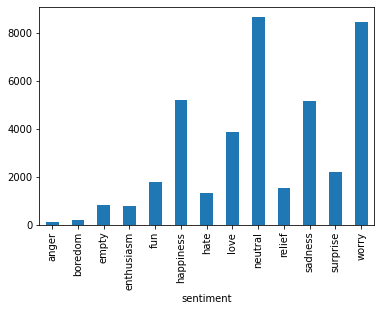

In [9]:
target = df.groupby('sentiment')['sentiment'].count()
target.plot.bar()

In [10]:
# for_sampling_enthu = df[(df.sentiment == 'enthusiasm')]
# for_sampling_enthu = for_sampling_enthu.sample(n=110, random_state=1)

# for_sampling_boredom = df[(df.sentiment == 'boredom')]
# for_sampling_boredom = for_sampling_boredom.sample(n=110, random_state=1)

# for_sampling_anger = df[(df.sentiment == 'anger')]
# for_sampling_anger = for_sampling_anger.sample(n=110, random_state=1)

# df = for_sampling_enthu.append(for_sampling_boredom, ignore_index=True)
# df = df.append(for_sampling_anger, ignore_index=True)

# Data Cleaning

In [11]:
df.head()

,tweet_id,sentiment,author,content,length
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,19
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,11
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,3
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,7
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,15


Decoding: unicode_escape for extra “\” before unicode character, then unidecode
Apostrophe handled: there are two characters people use for contraction. “’”(apostrophe) and “‘“(single quote). If these two symbols are both used for contraction, it will be difficult to detect and properly map the right expanded form. So any “’”(apostrophe) is changed to “‘“(single quote)
Contraction check: check if there’s any contracted form, and replace it with its original form

Parsing: done with Spacy

Filtering punctuation, white space, numbers, URL using Spacy methods while keeping the text content of hashtag intact

Removed @mention

Lemmatize: lemmatized each token using Spacy method ‘.lemma_’. Pronouns are kept as they are since Spacy lemmatizer transforms every pronoun to “-PRON-”
Special character removal

Single syllable token removal

Spell correction: it is a simple spell correction dealing with repeated characters such as “sooooo goooood”. If the same character is repeated more than two times, it shortens the repetition to two. For example “sooooo goooood” will be transformed as “soo good”. This is not a perfect solution since even after correction, in case of “soo”, it is not a correct spelling. But at least it will help to reduce feature space by making “sooo”, “soooo”, “sooooo” to the same word “soo”

In [12]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" } 

In [13]:
import codecs
import unidecode
import re
import spacy
nlp = spacy.load('en')

def spacy_cleaner(text):
    try:
        decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
    except:
        decoded = unidecode.unidecode(text)
    apostrophe_handled = re.sub("’", "'", decoded)
    expanded = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in apostrophe_handled.split(" ")])
    parsed = nlp(expanded)
    final_tokens = []
    for t in parsed:
        if t.is_punct or t.is_space or t.like_num or t.like_url or str(t).startswith('@'):
            pass
        else:
            if t.lemma_ == '-PRON-':
                final_tokens.append(str(t))
            else:
                sc_removed = re.sub("[^a-zA-Z]", '', str(t.lemma_))
                if len(sc_removed) > 1:
                    final_tokens.append(sc_removed)
    joined = ' '.join(final_tokens)
    spell_corrected = re.sub(r'(.)\1+', r'\1\1', joined)
    return spell_corrected

In [14]:
pd.set_option('display.max_colwidth', -1)
df.content[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


0    @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[                                        
1    Layin n bed with a headache  ughhhh...waitin on your call...                                                                        
2    Funeral ceremony...gloomy friday...                                                                                                 
3    wants to hang out with friends SOON!                                                                                                
4    @dannycastillo We want to trade with someone who has Houston tickets, but no one will.                                              
5    Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends                                                
6    I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!
7    Hmmm. http://www.djhero.com/ 

In [15]:
[spacy_cleaner(t) for t in df.content[:10]]

['know be listenin to bad habit earlier and start freakin at his part',
 'layin bed with headache ughh waitin on your call',
 'funeral ceremony gloomy friday',
 'want to hang out with friend soon',
 'We want to trade with someone who have Houston ticket but no will',
 'Re ping why do not you go to prom BC my bf do not like my friend',
 'I should be sleep but i be not think about an old friend who I want but he be married now damn amp he want me scandalous',
 'Hmm be down',
 'Charlene my love I miss you',
 'I be sorry at least it be Friday']

In [16]:
df['clean_text'] = [spacy_cleaner(t) for t in df.content] #not using the clean_text col for now

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\ '
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\l'
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\|'
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\m'
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\/'
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\o'
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\y'
  if __name__ == '__main__':


In [17]:
#What are the symbols mean
for i,t in enumerate(df.content):
    if '\l' in t:
        print(i,t)
    elif '\|' in t:
        print(i,t)
    elif '\m' in t:
        print(i,t)
    elif '\/' in t:
        print(i,t)
    elif '\o' in t:
        print(i,t)
    elif '\y' in t:
        print(i,t)       

11407 bored, no one is on \line to talk to
17507 mad the rain got me...now i cant go see jaiden   *|)|/-\|\|/-\*
18968 GRRRR!!! It's BACK!!!!! And what I mean is my headache  But on the *       *        bright side....it's only on one side!!!! /\/\/\/\/\
19250 joooooooooooooo!!!!!!!!!!!! studying!!!  to be readdy to go to the party!!!   If they let me go!!  jajaja I think yeaahh!!! \m/!!
30308 is hungryyyyyyy!! going to eat traditional indian food...the pakistani way. woowoo!  hahaha! &gt;[_()\/3
32895 o/*\o (high five) to all of our fans! It's finally here! I'll write up a fancy news post shortly, wanted to get the mod itself out ASAP
33341 @AspaPhoto Ahhhh \you are soo smart  Thanks for this schooling of thoughts
33399 @AspaPhoto Ahhhh \you are soo smart  Thanks for this schooling of thoughts  Have you taught before?
37526 word to yer mother!!   \m/
37567 epic day/night. disappointing loss #canucks but watching star trek made it so much better  live long &amp; prosper friends. night 

In [18]:
df.content[17507]

'mad the rain got me...now i cant go see jaiden   *|)|/-\\|\\|/-\\*'

In [19]:
spacy_cleaner(df.content[17507])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\|'
  if __name__ == '__main__':


'mad the rain get me now can not go see jaiden'

In [20]:
#df=df.drop(['cleaned_text'], axis=1)
df

,tweet_id,sentiment,author,content,length,clean_text
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,19,know be listenin to bad habit earlier and start freakin at his part
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,11,layin bed with headache ughh waitin on your call
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,3,funeral ceremony gloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,7,want to hang out with friend soon
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",15,We want to trade with someone who have Houston ticket but no will
...,...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor,1,
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,7,Happy Mothers Day all my love
39997,1753919005,love,JenniRox,"Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!",25,Happy Mother Day to all the mommy out there be you woman or man as long as you be momma to someone this be your day
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!,20,WASSUP BEAUTIFUL follow me PEEP out my new hit single WWMYSPACECOM IPSOHOT I def WAT in the video


In [21]:
import numpy as np
df['clean_text'].replace('', np.nan, inplace=True)
df = df.dropna().reset_index(drop=True)
df

,tweet_id,sentiment,author,content,length,clean_text
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,19,know be listenin to bad habit earlier and start freakin at his part
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,11,layin bed with headache ughh waitin on your call
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,3,funeral ceremony gloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,7,want to hang out with friend soon
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",15,We want to trade with someone who have Houston ticket but no will
...,...,...,...,...,...,...
39896,1753918900,happiness,courtside101,Succesfully following Tayla!!,3,succesfully follow Tayla
39897,1753919001,love,drapeaux,Happy Mothers Day All my love,7,Happy Mothers Day all my love
39898,1753919005,love,JenniRox,"Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!",25,Happy Mother Day to all the mommy out there be you woman or man as long as you be momma to someone this be your day
39899,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!,20,WASSUP BEAUTIFUL follow me PEEP out my new hit single WWMYSPACECOM IPSOHOT I def WAT in the video


In [22]:
df_after_cleaning = df

# BERT and KTRAIN

In [23]:
df = df_after_cleaning

In [24]:
# df = df[(df.sentiment != 'neutral')&
# (df.sentiment !='worry')&    
# (df.sentiment !='happiness')&  
# (df.sentiment !='sadness')&
# (df.sentiment !='love')&
# (df.sentiment !='surprise')&
# (df.sentiment !='fun')&
# (df.sentiment !='relief')&
# (df.sentiment !='hate')&
# (df.sentiment !='empty') &
# 'enthusiasm', 
# 'boredom', 
# 'anger'
#  ]

# df = df[(df.sentiment != 'neutral')&
# (df.sentiment !='worry')&    
# (df.sentiment !='happiness')&  
# (df.sentiment !='sadness')&
# (df.sentiment !='love')&
# (df.sentiment !='surprise')&
# (df.sentiment !='empty')
#  ]

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# train, test = train_test_split(df, test_size=0.2)
# train.head(10)

random_seed = 12342
train, test = train_test_split(df, shuffle=True, test_size = 0.2, 
                               random_state=random_seed, stratify=df['sentiment'])

train.head()

,tweet_id,sentiment,author,content,length,clean_text
24053,1694768529,happiness,joeljansson,Soon my new job starts I'm so happy!,9,soon my new job start I be so happy
16918,1965492434,worry,carlystienstra,@Victoriouz tres rude VICTOR! :\,6,tre rude VICTOR
16661,1965427203,worry,N0R3,ugh! looks like it can rain any min now,9,ugh look like it can rain any min now
8786,1962309978,sadness,simplyJenGrier,I need to stop being sick.,6,I need to stop be sick
22916,1694531535,surprise,varunshridhar,"@kadambariyer wow, I see a Mr.B obsession in you!!",9,wow I see Mr obsession in you


In [26]:
df.sentiment.value_counts()

neutral       8566
worry         8454
happiness     5208
sadness       5162
love          3841
surprise      2185
fun           1776
relief        1526
hate          1323
empty         812 
enthusiasm    759 
boredom       179 
anger         110 
Name: sentiment, dtype: int64

In [27]:
# X_train = train.content.tolist()
# X_test = test.content.tolist()

# y_train = train.sentiment.tolist()
# y_test = test.sentiment.tolist()

# data = train.append(test, ignore_index=True)

# print('size of training set: %s' % (len(train['content'])))
# print('size of validation set: %s' % (len(test['content'])))
# print(data.sentiment.value_counts())

# data.head(10)

X_train = train.clean_text.tolist()
X_test = test.clean_text.tolist()

y_train = train.sentiment.tolist()
y_test = test.sentiment.tolist()

data = train.append(test, ignore_index=True)

print('size of training set: %s' % (len(train['clean_text'])))
print('size of validation set: %s' % (len(test['clean_text'])))
print(data.sentiment.value_counts())

data.head(10)

size of training set: 31920
size of validation set: 7981
neutral       8566
worry         8454
happiness     5208
sadness       5162
love          3841
surprise      2185
fun           1776
relief        1526
hate          1323
empty         812 
enthusiasm    759 
boredom       179 
anger         110 
Name: sentiment, dtype: int64


,tweet_id,sentiment,author,content,length,clean_text
0,1694768529,happiness,joeljansson,Soon my new job starts I'm so happy!,9,soon my new job start I be so happy
1,1965492434,worry,carlystienstra,@Victoriouz tres rude VICTOR! :\,6,tre rude VICTOR
2,1965427203,worry,N0R3,ugh! looks like it can rain any min now,9,ugh look like it can rain any min now
3,1962309978,sadness,simplyJenGrier,I need to stop being sick.,6,I need to stop be sick
4,1694531535,surprise,varunshridhar,"@kadambariyer wow, I see a Mr.B obsession in you!!",9,wow I see Mr obsession in you
5,1752562354,surprise,A1ix,omg patron is 1ofmy FAVS @NOEL4PRESIDENT im so jealous icant do 10 but i can do 5 so make it 15 so serious im in alabama visitin fam,30,omg patron be ofmy FAVS i be so jealous icant do but can do so make it so serious i be in alabama visitin fam
6,1963542484,worry,kaitlin12345,Good! luck you! I want new shoes Ly x,10,good luck you I want new shoe Ly
7,1695882955,happiness,Av1vM,@DarenYeow Oh wow they are really good I think Im going to use one of them lol.,18,oh wow they be really good I think I be go to use of them lol
8,1957122083,worry,joyofzen,@GQbound I didn't end up really eating had more snacks. sigh,12,I do not end up really eat have more snack sigh
9,1965994033,empty,babyperraton,Glenna is bored but glad that it is a beautiful day. Macy went swimming and Kris played golf while I sat at home waiting for them,26,Glenna be bored but glad that it be beautiful day Macy go swim and Kris play golf while I sit at home wait for them


In [28]:
class_names=['neutral',
'worry',       
'happiness',    
'sadness',
'love', 
'surprise',
'fun', 
'relief',
'hate',  
'empty',
'enthusiasm', 
'boredom', 
'anger']

encoding = {
'neutral':0,
'worry':1,       
'happiness':2,    
'sadness':3,
'love':4, 
'surprise':5,
'fun':6, 
'relief':7,
'hate':8,  
'empty':9,
'enthusiasm':10, 
'boredom':11, 
'anger':12
}

# class_names=[
# 'fun', 
# 'relief', 
# 'hate',
# 'anger',
# 'boredom',
# 'enthusiasm']

# encoding = {
# 'fun':0, 
# 'relief':1, 
# 'hate':2,
# 'anger':3,
# 'boredom':4,
# 'enthusiasm':5
# }

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [ ]:
import ktrain
from ktrain import text

(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       lang='en',
                                                                       maxlen=350, 
                                                                       max_features=35000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

# # find good learning rate
# learner.lr_find()             # briefly simulate training to find good learning rate
# learner.lr_plot()             # visually identify best learning rate 

In [ ]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
4208/5320 [======================>.......] - ETA: 18:11 - loss: 1.9287 - accuracy: 0.3380

In [ ]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

     neutral       0.42      0.56      0.48      1713
       worry       0.38      0.61      0.47      1691
   happiness       0.36      0.53      0.43      1042
     sadness       0.45      0.24      0.31      1033
        love       0.48      0.42      0.45       768
    surprise       0.32      0.01      0.03       437
         fun       0.43      0.01      0.02       355
      relief       0.23      0.02      0.04       305
        hate       0.40      0.20      0.27       265
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       152
     boredom       0.00      0.00      0.00        36
       anger       0.00      0.00      0.00        22

    accuracy                           0.40      7981
   macro avg       0.27      0.20      0.19      7981
weighted avg       0.38      0.40      0.35      7981



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 963,  423,  204,   38,   63,    3,    0,    5,   14,    0,    0,
           0,    0],
       [ 310, 1031,  125,  151,   41,    2,    2,    3,   26,    0,    0,
           0,    0],
       [ 234,   96,  555,   17,  131,    2,    1,    5,    1,    0,    0,
           0,    0],
       [ 146,  527,   62,  243,   32,    1,    0,    2,   20,    0,    0,
           0,    0],
       [ 125,   69,  205,   32,  326,    2,    1,    3,    5,    0,    0,
           0,    0],
       [ 117,  179,   84,   17,   27,    6,    0,    3,    4,    0,    0,
           0,    0],
       [  99,   50,  164,    6,   29,    2,    3,    1,    1,    0,    0,
           0,    0],
       [ 104,   69,   95,    9,   20,    0,    0,    7,    1,    0,    0,
           0,    0],
       [  33,  155,    8,   16,    0,    0,    0,    0,   53,    0,    0,
           0,    0],
       [  59,   77,   10,    5,    5,    1,    0,    1,    4,    0,    0,
           0,    0],
       [  71,   32,   38,    3,    8,    0,    0, 

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['fun', 'relief', 'hate']

In [ ]:
import time 

message = "happily married"

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: relief (0.17)


In [ ]:
# the one we got most wrong
learner.view_top_losses(n=1, preproc=preproc)

----------
id:119 | loss:5.31 | true:anger | pred:fun)

[CLS] have kick ##ass day full of sea ##world re ##tar ##d year old guy and men origin win day [SEP]


In [ ]:
predictor.explain('I love team pineapples')

In [ ]:
predictor.predict_proba('a terrible thing happened')

array([0.5459754 , 0.3032034 , 0.15082122], dtype=float32)

In [ ]:
# let's save the predictor for later use
predictor.save("models/bert_model")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# LSTM

In [ ]:
import nltk
nltk.download("punkt")
from tensorflow.keras.preprocessing.text import Tokenizer

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['clean_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Found 26402 unique tokens.


In [ ]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['clean_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (39901, 250)


In [ ]:
Y = pd.get_dummies(df['sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (39901, 13)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(35910, 250) (35910, 13)
(3991, 250) (3991, 13)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 1
batch_size = 6

history = model.fit(X_train, Y_train,
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', 
                                             patience=3, 
                                             min_delta=0.0001)])


5387/5387 [==============================] - 2381s 441ms/step - loss: 1.9692 - accuracy: 0.3221 - val_loss: 1.8810 - val_accuracy: 0.3590


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

125/125 [==============================] - 8s 68ms/step - loss: 1.8809 - accuracy: 0.3523
Test set
  Loss: 1.881
  Accuracy: 0.352


In [ ]:
from sklearn.metrics import classification_report


y_pred = model.predict(X_test, batch_size=6, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred_bool))

666/666 [==============================] - 25s 38ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        94
           3       0.00      0.00      0.00        71
           4       0.00      0.00      0.00       169
           5       0.31      0.52      0.39       484
           6       0.54      0.05      0.10       132
           7       0.57      0.33      0.42       415
           8       0.37      0.54      0.44       852
           9       0.00      0.00      0.00       169
          10       0.32      0.32      0.32       495
          11       0.00      0.00      0.00       249
          12       0.33      0.47      0.38       838

    accuracy                           0.35      3991
   macro avg       0.19      0.17      0.16      3991
weighted avg       0.30      0.35      0.31      3991



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


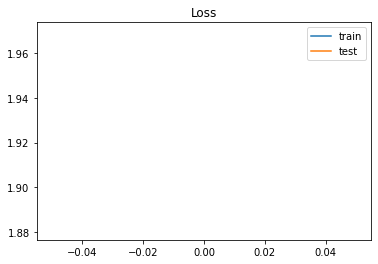

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

KeyError: ignored

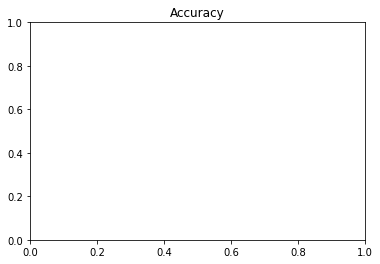

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [ ]:
new_complaint = ['I hate appearing for job interviews']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = class_names
print(pred, labels[np.argmax(pred)])

[[0.00254813 0.00900733 0.01146099 0.00243534 0.00220467 0.00499277
  0.33564758 0.00898251 0.03467663 0.00616684 0.40779948 0.02253708
  0.15154065]] enthusiasm


# Fast text

In [ ]:
X_train = train.clean_text.tolist()
X_test = test.clean_text.tolist()

y_train = train.sentiment.tolist()
y_test = test.sentiment.tolist()

data = train.append(test, ignore_index=True)

class_names=['neutral',
'worry',       
'happiness',    
'sadness',
'love', 
'surprise',
'fun', 
'relief',
'hate',  
'empty',
'enthusiasm', 
'boredom', 
'anger']

encoding = {
'neutral':0,
'worry':1,       
'happiness':2,    
'sadness':3,
'love':4, 
'surprise':5,
'fun':6, 
'relief':7,
'hate':8,  
'empty':9,
'enthusiasm':10, 
'boredom':11, 
'anger':12
}

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

import ktrain
from ktrain import text

(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       lang='en',
                                                                       maxlen=350, 
                                                                       max_features=35000)

language: en
Word Counts: 22991
Nrows: 31920
31920 train sequences
train sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 27
x_train shape: (31920,350)
y_train shape: (31920, 13)
Is Multi-Label? False
7981 test sequences
test sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 27
x_test shape: (7981,350)
y_test shape: (7981, 13)
task: text classification


In [ ]:
# define model a fastText-like architecture using ktrain
model = text.text_classifier('fasttext', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 350
done.


In [ ]:
# wrap model and data in Learner object
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
5320/5320 [==============================] - 56s 10ms/step - loss: 2.7956 - accuracy: 0.1414


done.
Visually inspect loss plot and select learning rate associated with falling loss


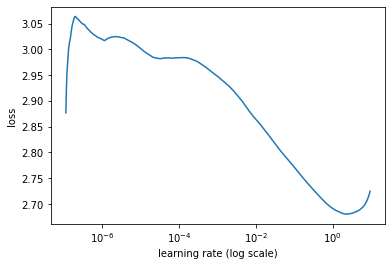

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
#learner.fit_onecycle(2e-5, 5)
# learner.autofit(7e-3,monitor='val_accuracy') #0.35
learner.autofit(7e-3,monitor='val_accuracy')

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.007...
Epoch 1/1024
5320/5320 [==============================] - 174s 33ms/step - loss: 2.1601 - accuracy: 0.2448 - val_loss: 1.9951 - val_accuracy: 0.3155
Epoch 2/1024
5320/5320 [==============================] - 176s 33ms/step - loss: 2.0534 - accuracy: 0.2827 - val_loss: 1.9772 - val_accuracy: 0.3231
Epoch 3/1024
5320/5320 [==============================] - 168s 32ms/step - loss: 2.0277 - accuracy: 0.2946 - val_loss: 1.9571 - val_accuracy: 0.3328
Epoch 4/1024
5320/5320 [==============================] - 170s 32ms/step - loss: 2.0072 - accuracy: 0.3008 - val_loss: 1.9473 - val_accuracy: 0.3350
Epoch 5/1024
5320/5320 [==============================] - 167s 31ms/step - loss: 1.9951 - accuracy: 0.3090 - val_loss: 1.9456 - val_accuracy: 0.3458
Epoch 6/1024
5320/5320 [==============================] - 171s 32ms/ste

In [ ]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

     neutral       0.38      0.48      0.42      1713
       worry       0.31      0.68      0.42      1691
   happiness       0.36      0.48      0.41      1042
     sadness       0.48      0.04      0.08      1033
        love       0.54      0.32      0.40       768
    surprise       0.00      0.00      0.00       437
         fun       0.00      0.00      0.00       355
      relief       0.00      0.00      0.00       305
        hate       0.45      0.13      0.20       265
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       152
     boredom       0.00      0.00      0.00        36
       anger       0.00      0.00      0.00        22

    accuracy                           0.35      7981
   macro avg       0.19      0.16      0.15      7981
weighted avg       0.32      0.35      0.29      7981



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 822,  637,  206,    4,   39,    0,    0,    0,    5,    0,    0,
           0,    0],
       [ 362, 1156,  100,   30,   27,    0,    0,    0,   16,    0,    0,
           0,    0],
       [ 236,  244,  497,    0,   65,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 159,  752,   42,   44,   21,    0,    0,    0,   15,    0,    0,
           0,    0],
       [ 131,  159,  227,    6,  242,    0,    0,    0,    3,    0,    0,
           0,    0],
       [ 124,  230,   67,    1,   13,    0,    0,    0,    2,    0,    0,
           0,    0],
       [ 100,  123,  112,    0,   20,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  96,  114,   83,    0,   12,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  35,  184,    4,    7,    0,    0,    0,    0,   35,    0,    0,
           0,    0],
       [  59,   86,   13,    0,    3,    0,    0,    0,    1,    0,    0,
           0,    0],
       [  51,   60,   36,    0,    5,    0,    0, 

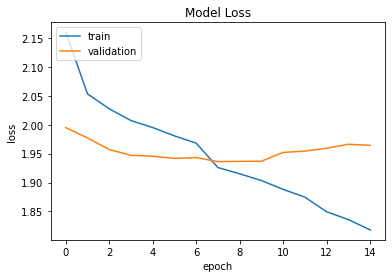

In [ ]:
learner.plot()

#NBSVM

In [29]:
import ktrain
from ktrain import text

(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='standard',
                                                                       lang='en',
                                                                       maxlen=350, 
                                                                       val_pct=0.1,
                                                                       ngram_range=3,
                                                                       max_features=35000)

language: en
Word Counts: 22991
Nrows: 31920
31920 train sequences
train sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 27
Adding 3-gram features
max_features changed to 436768 with addition of ngrams
Average train sequence length with ngrams: 34
train (w/ngrams) sequence lengths:
	mean : 34
	95percentile : 69
	99percentile : 78
x_train shape: (31920,350)
y_train shape: (31920, 13)
Is Multi-Label? False
7981 test sequences
test sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 27
Average test sequence length with ngrams: 23
test (w/ngrams) sequence lengths:
	mean : 23
	95percentile : 50
	99percentile : 59
x_test shape: (7981,350)
y_test shape: (7981, 13)
task: text classification


In [30]:
# define model a fastText-like architecture using ktrain
model = text.text_classifier('nbsvm', train_data=(x_train, y_train) , preproc=preproc)

learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

Is Multi-Label? False
compiling word ID features...
maxlen is 350
building document-term matrix... this may take a few moments...
rows: 1-10000
rows: 10001-20000
rows: 20001-30000
rows: 30001-31920
computing log-count ratios...
done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
5320/5320 [==============================] - 14s 3ms/step - loss: 13.7551 - accuracy: 0.1120


done.
Visually inspect loss plot and select learning rate associated with falling loss


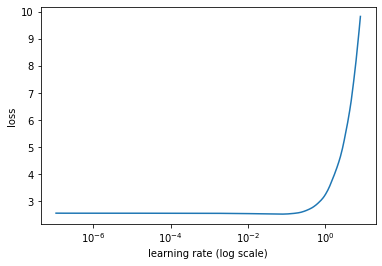

In [31]:
learner.lr_find(show_plot=True)

In [46]:
learner.autofit(3e-1, monitor='val_accuracy')

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.3...
Epoch 1/1024
5320/5320 [==============================] - 42s 8ms/step - loss: 361.9616 - accuracy: 0.5565 - val_loss: 857.5176 - val_accuracy: 0.1951
Epoch 2/1024
5320/5320 [==============================] - 41s 8ms/step - loss: 322.1336 - accuracy: 0.5754 - val_loss: 853.4880 - val_accuracy: 0.1930
Epoch 3/1024
5320/5320 [==============================] - ETA: 0s - loss: 286.6204 - accuracy: 0.5912
Epoch 00003: Reducing Max LR on Plateau: new max lr will be 0.15 (if not early_stopping).
5320/5320 [==============================] - 41s 8ms/step - loss: 286.6204 - accuracy: 0.5912 - val_loss: 846.8199 - val_accuracy: 0.1907
Epoch 4/1024
5320/5320 [==============================] - 42s 8ms/step - loss: 254.6545 - accuracy: 0.6093 - val_loss: 844.3721 - val_accuracy: 0.1905
Epoch 5/1024
5319/5320 [===========

In [47]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

     neutral       0.25      0.20      0.22      1713
       worry       0.29      0.25      0.27      1691
   happiness       0.19      0.18      0.18      1042
     sadness       0.22      0.22      0.22      1033
        love       0.18      0.33      0.24       768
    surprise       0.10      0.07      0.08       437
         fun       0.09      0.06      0.07       355
      relief       0.08      0.08      0.08       305
        hate       0.14      0.14      0.14       265
       empty       0.01      0.01      0.01       162
  enthusiasm       0.05      0.05      0.05       152
     boredom       0.00      0.00      0.00        36
       anger       0.00      0.00      0.00        22

    accuracy                           0.20      7981
   macro avg       0.12      0.12      0.12      7981
weighted avg       0.20      0.20      0.20      7981



array([[339, 303, 206, 212, 267,  66,  49,  71,  58,  41,  24,  28,  49],
       [260, 420, 172, 273, 226,  67,  40,  47,  61,  29,  27,  30,  39],
       [183, 138, 188,  97, 212,  40,  37,  48,  19,  17,  24,   9,  30],
       [141, 226,  99, 230, 132,  43,  29,  24,  37,  18,  14,  16,  24],
       [121,  82, 122,  64, 257,  23,  20,  29,  13,   7,   6,   7,  17],
       [ 87,  72,  45,  49,  71,  31,  14,  16,  11,   9,  14,  10,   8],
       [ 69,  45,  57,  32,  64,  13,  22,  10,  12,   5,  13,   6,   7],
       [ 52,  45,  42,  30,  64,  11,   9,  24,   7,   5,   7,   4,   5],
       [ 49,  37,  28,  30,  34,   6,   9,   8,  37,   9,   4,   7,   7],
       [ 32,  23,  17,  26,  35,   5,   4,   6,   4,   2,   2,   5,   1],
       [ 25,  24,  20,  13,  25,   6,  11,   6,   4,   5,   7,   4,   2],
       [  5,   9,   4,   5,   5,   4,   2,   0,   0,   0,   0,   0,   2],
       [  7,   7,   1,   2,   1,   0,   1,   1,   1,   0,   0,   1,   0]])